# Task #2 IMDb Movies Rating Prediction 

In [30]:
import pandas as pd
import numpy as np


# File ko read karte waqt encoding specify karein
df = pd.read_csv('C:\\Users\\Administrator\\Desktop\\IMDb Movies India.csv', encoding='latin-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.dtypes,df.isna().sum(),df.index,df.columns

(Name         object
 Year         object
 Duration     object
 Genre        object
 Rating      float64
 Votes        object
 Director     object
 Actor 1      object
 Actor 2      object
 Actor 3      object
 dtype: object,
 Name           0
 Year         528
 Duration    8269
 Genre       1877
 Rating      7590
 Votes       7589
 Director     525
 Actor 1     1617
 Actor 2     2384
 Actor 3     3144
 dtype: int64,
 RangeIndex(start=0, stop=15509, step=1),
 Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
        'Actor 1', 'Actor 2', 'Actor 3'],
       dtype='object'))

In [32]:
df=df.dropna()

In [34]:

df.

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [35]:
df['Votes']=df['Votes'].str.replace(',', '')
df['Votes'] = df['Votes'].str.replace('[\$,M]', '')
df


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6444\3672013688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Votes']=df['Votes'].str.replace(',', '')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6444\3672013688.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Votes'] = df['Votes'].str.replace('[\$,M]', '')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6444\3672013688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['V

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [38]:
df['Genre'].unique()

array(['Drama', 'Comedy, Romance', 'Comedy, Drama, Musical',
       'Drama, Romance, War', 'Horror, Mystery, Thriller',
       'Action, Crime, Thriller', 'Horror', 'Horror, Romance, Thriller',
       'Comedy, Drama, Romance', 'Comedy, Drama', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Comedy, Horror', 'Drama, Horror, Mystery',
       'Action, Thriller', 'Action', 'Horror, Mystery, Romance',
       'Horror, Mystery', 'Drama, Horror, Romance',
       'Action, Drama, History', 'Action, Drama, War', 'Thriller',
       'Comedy', 'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'Drama, History', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Adventure, Drama', 'Comedy, Mystery, Thriller', 'Drama, Romance',
       'Crime, Thriller', 'Horror, Sci-Fi, Thriller',
       'Drama, Mystery, Thriller', 'Drama, Family, Musical',
       'Action, Comedy', 'Action, Adventure, Fantasy', 'Documentary',
       'Drama, Horro

In [39]:

df['Votes']=df['Votes'].astype(int)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6444\2573504863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Votes']=df['Votes'].astype(int)


In [41]:
df['Votes'],df.dtypes,df.isna().sum()

(1           8
 3          35
 5         827
 6        1086
 8         326
          ... 
 15493     408
 15494    1496
 15503      44
 15505     655
 15508      20
 Name: Votes, Length: 5659, dtype: int32,
 Name         object
 Year         object
 Duration     object
 Genre        object
 Rating      float64
 Votes         int32
 Director     object
 Actor 1      object
 Actor 2      object
 Actor 3      object
 dtype: object,
 Name        0
 Year        0
 Duration    0
 Genre       0
 Rating      0
 Votes       0
 Director    0
 Actor 1     0
 Actor 2     0
 Actor 3     0
 dtype: int64)

In [126]:
df["Duration"]=df["Duration"].str.replace('min','')

df["Duration"]=df["Duration"].astype(int)
df.dtypes,df.isna().sum()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6444\3553038204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Duration"]=df["Duration"].str.replace('min','')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6444\3553038204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Duration"]=df["Duration"].astype(int)


(Name         object
 Year          int32
 Duration      int32
 Genre        object
 Rating      float64
 Votes         int32
 Director     object
 Actor 1      object
 Actor 2      object
 Actor 3      object
 dtype: object,
 Name        0
 Year        0
 Duration    0
 Genre       0
 Rating      0
 Votes       0
 Director    0
 Actor 1     0
 Actor 2     0
 Actor 3     0
 dtype: int64)

In [ ]:
df["Year"]=df["Year"].str.replace('(','').str.replace(')','')

df["Year"]=df["Year"].astype(int)

In [60]:
top_director=df['Director'].value_counts()[0:10]
top_director=top_director.sort_values(ascending=False)
top_director

David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Vikram Bhatt            30
Priyadarshan            29
Basu Chatterjee         23
Rama Rao Tatineni       23
Shyam Benegal           22
Name: Director, dtype: int64

In [57]:
df[['Actor 1','Actor 2','Actor 3']].value_counts().sort_values(ascending=False)

Actor 1           Actor 2        Actor 3       
Dibakar Banerjee  Karan Johar    Anurag Kashyap    3
Anil Kapoor       Sridevi        Anupam Kher       3
Dharmendra        Sunny Deol     Bobby Deol        3
                  Saira Banu     Feroz Khan        2
Anil Kapoor       Sanjay Dutt    Akshaye Khanna    2
                                                  ..
Zayed Khan        Dia Mirza      Cyrus Sahukar     1
                  Esha Deol      Gulshan Grover    1
                  Isha Sharvani  Minissha Lamba    1
                  Tina Desai     Anupam Kher       1
Zulfi Sayed       Sonya Jehan    Kabir Bedi        1
Length: 5604, dtype: int64

In [87]:
low_director=df['Director'].value_counts().tail(10)
low_director=low_director.sort_values(ascending=False)
low_director

Dayanand            1
Santosh Kashyap     1
Manav Kaul          1
Sajeev Balath       1
Anand Patwardhan    1
Sriram Raja         1
Randeep Jha         1
Vicky Bhardwaj      1
Salar Shaikh        1
Mozez Singh         1
Name: Director, dtype: int64

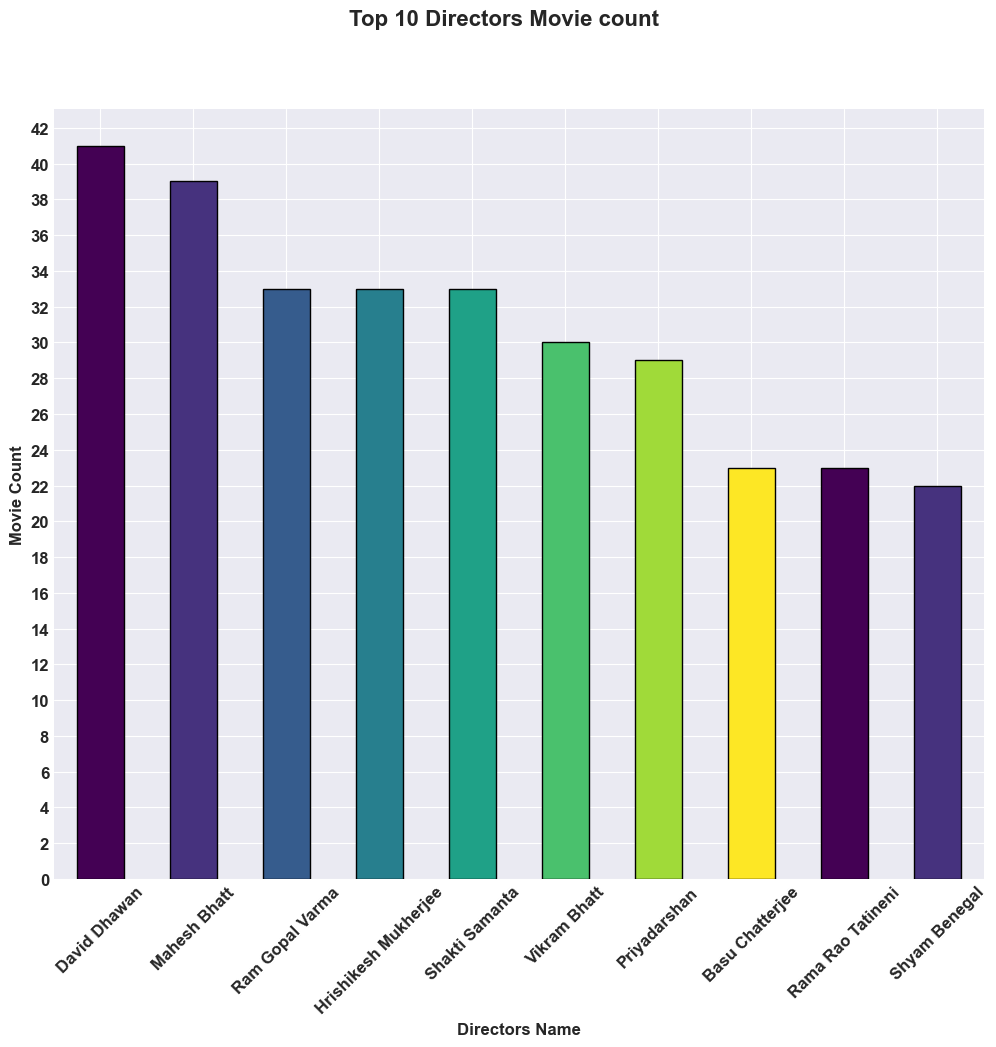

In [104]:
import matplotlib.pyplot as plt
colors = np.linspace(0, 1, len('Director')) 
color_map = plt.get_cmap('viridis')
top_director.plot(kind='bar',figsize=(12,10),edgecolor='black',color=color_map(colors))
plt.suptitle('Top 10 Directors Movie count', fontsize=16,fontweight='bold')
plt.xlabel('Directors Name',fontsize=12,fontweight='bold')
plt.ylabel('Movie Count',fontsize=12,fontweight='bold')
plt.yticks(range(0,44,2),fontsize=12,fontweight='bold');
plt.xticks(rotation=45,fontsize=12,fontweight='bold')
plt.style.use('seaborn-v0_8-darkgrid')
plt.show()

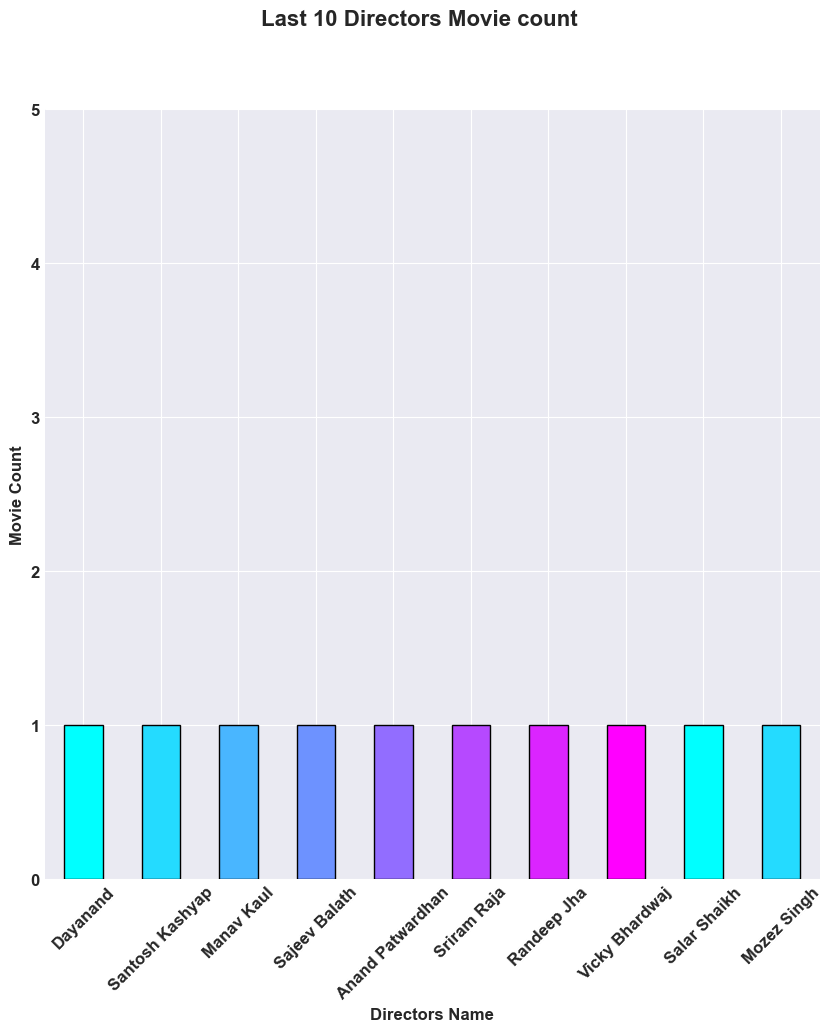

In [105]:
colors = np.linspace(0, 1, len('Director')) 
color_map = plt.get_cmap('cool')
low_director.plot(kind='bar',figsize=(10,10),edgecolor='black',color=color_map(colors))
plt.suptitle('Last 10 Directors Movie count', fontsize=16,fontweight='bold')
plt.xlabel('Directors Name',fontsize=12,fontweight='bold')
plt.ylabel('Movie Count',fontsize=12,fontweight='bold')
plt.yticks(range(0,6,1),fontsize=12,fontweight='bold');
plt.xticks(rotation=45,fontsize=12,fontweight='bold'),
plt.style.use('seaborn-v0_8-darkgrid')
plt.show()

In [129]:
top_rated_movies=df[['Name','Rating','Votes','Year','Duration','Director']].sort_values(by='Rating',ascending=False).head(10)
top_rated_movies

,Name,Rating,Votes,Year,Duration,Director
8339,Love Qubool Hai,10.0,5,2020,94,Saif Ali Sayeed
5410,Half Songs,9.7,7,2021,79,Sriram Raja
6852,June,9.4,18,2021,93,Suhrud Godbole
14222,The Reluctant Crime,9.4,16,2020,113,Arvind Pratap
5077,Gho Gho Rani,9.4,47,2019,105,Munni Pankaj
1314,Ashok Vatika,9.3,7,2018,97,Rahul Mallick
13231,Sindhustan,9.3,36,2019,64,Sapna Bhavnani
8344,Love Sorries,9.3,79,2021,101,Gautam Joshi
12673,Secrets of Sinauli,9.3,1373,2021,56,Raghav Jairath
11843,Refl3ct,9.3,467,2021,65,Nikhil Mahar


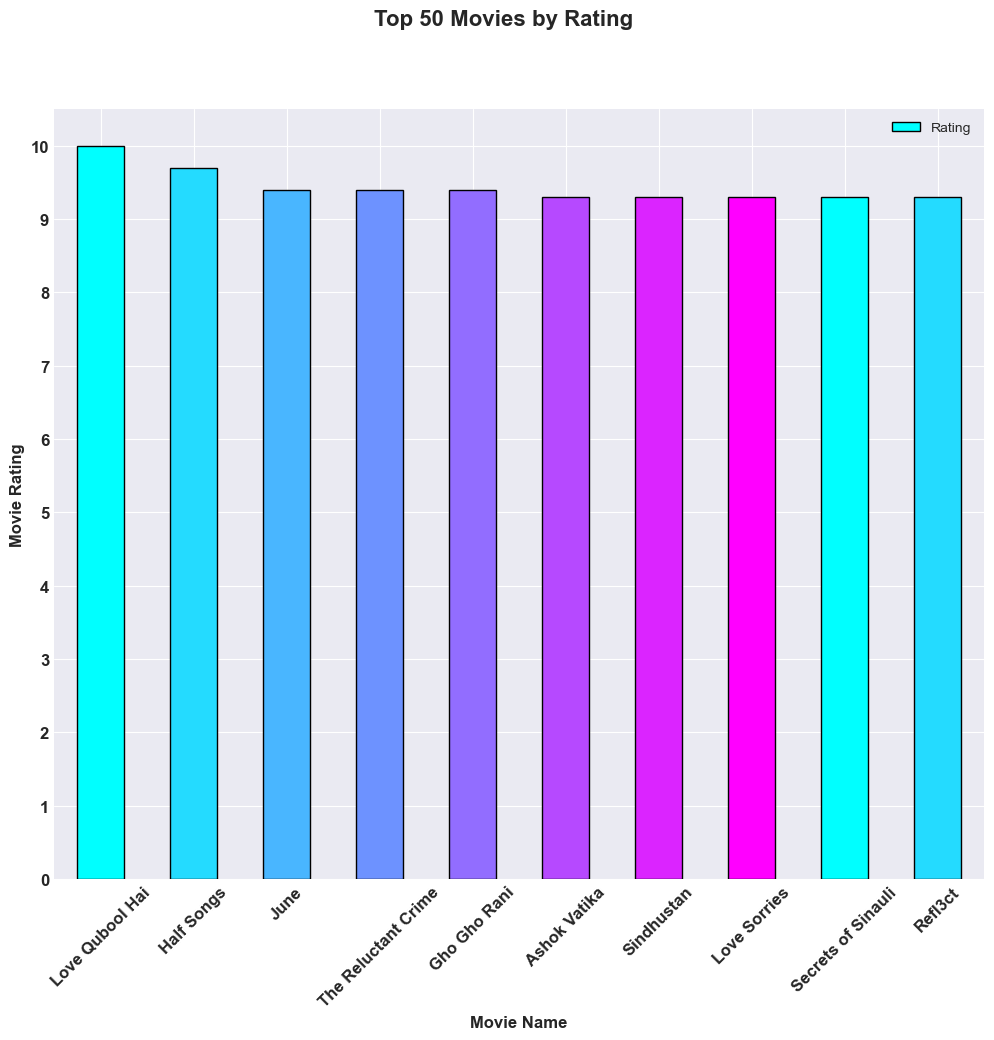

In [109]:
top_rated_movies.plot(x='Name', y='Rating', kind='bar',figsize=(12,10),edgecolor='black',color=color_map(colors))
colors = np.linspace(0, 1, len('Director')) 
color_map = plt.get_cmap('cool')
plt.suptitle('Top 50 Movies by Rating', fontsize=16,fontweight='bold')
plt.xlabel('Movie Name',fontsize=12,fontweight='bold')
plt.ylabel('Movie Rating',fontsize=12,fontweight='bold')
plt.yticks(range(0,11,1),fontsize=12,fontweight='bold');
plt.xticks(rotation=45,fontsize=12,fontweight='bold'),
plt.style.use('seaborn-v0_8-darkgrid')
plt.show()

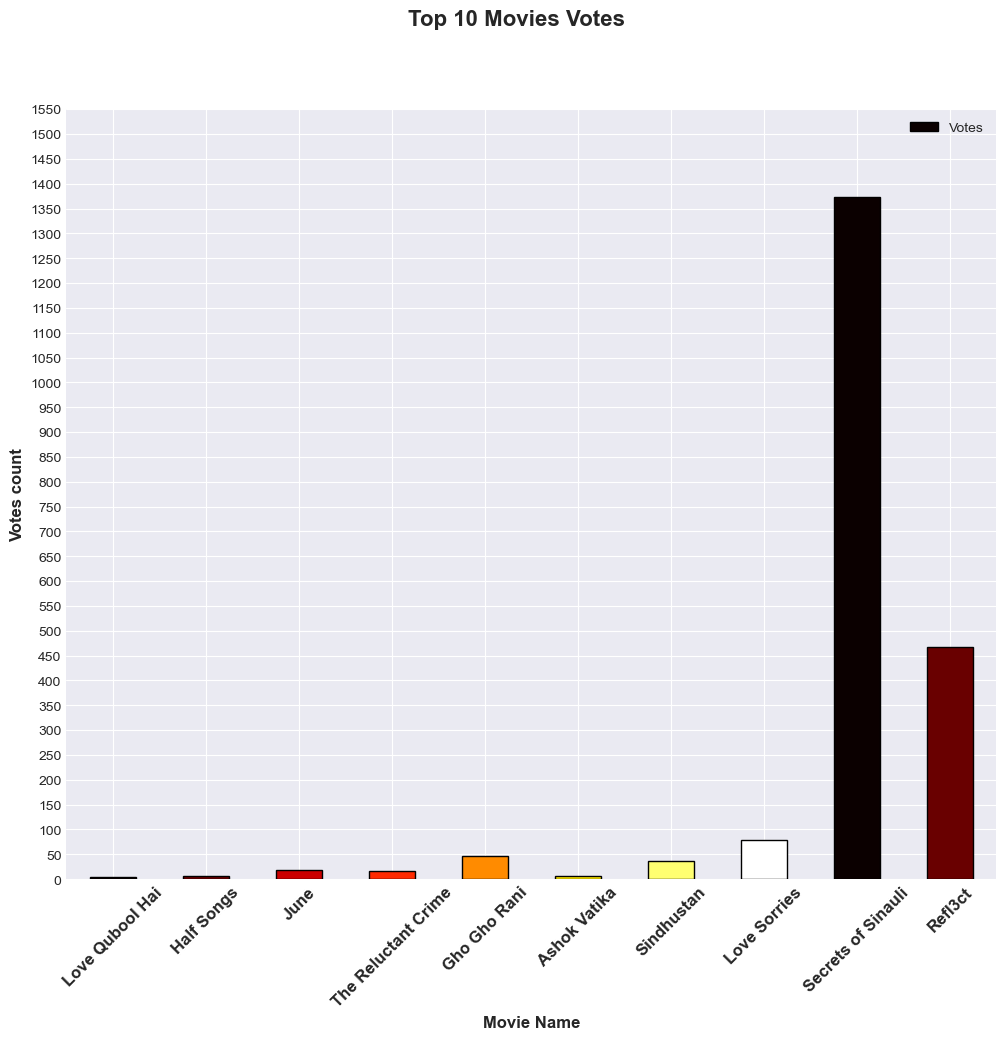

In [122]:
top_rated_movies.plot(x='Name', y='Votes', kind='bar',figsize=(12,10),edgecolor='black',color=color_map(colors))
color=np.linspace(0,1, len('Name'))
color_map = plt.get_cmap('hot')
plt.suptitle('Top 10 Movies Votes', fontsize=16,fontweight='bold')
plt.xlabel('Movie Name',fontsize=12,fontweight='bold')
plt.ylabel('Votes count',fontsize=12,fontweight='bold')
plt.yticks(range(0,1600,50));
plt.xticks(rotation=45,fontsize=12,fontweight='bold'),
plt.show()

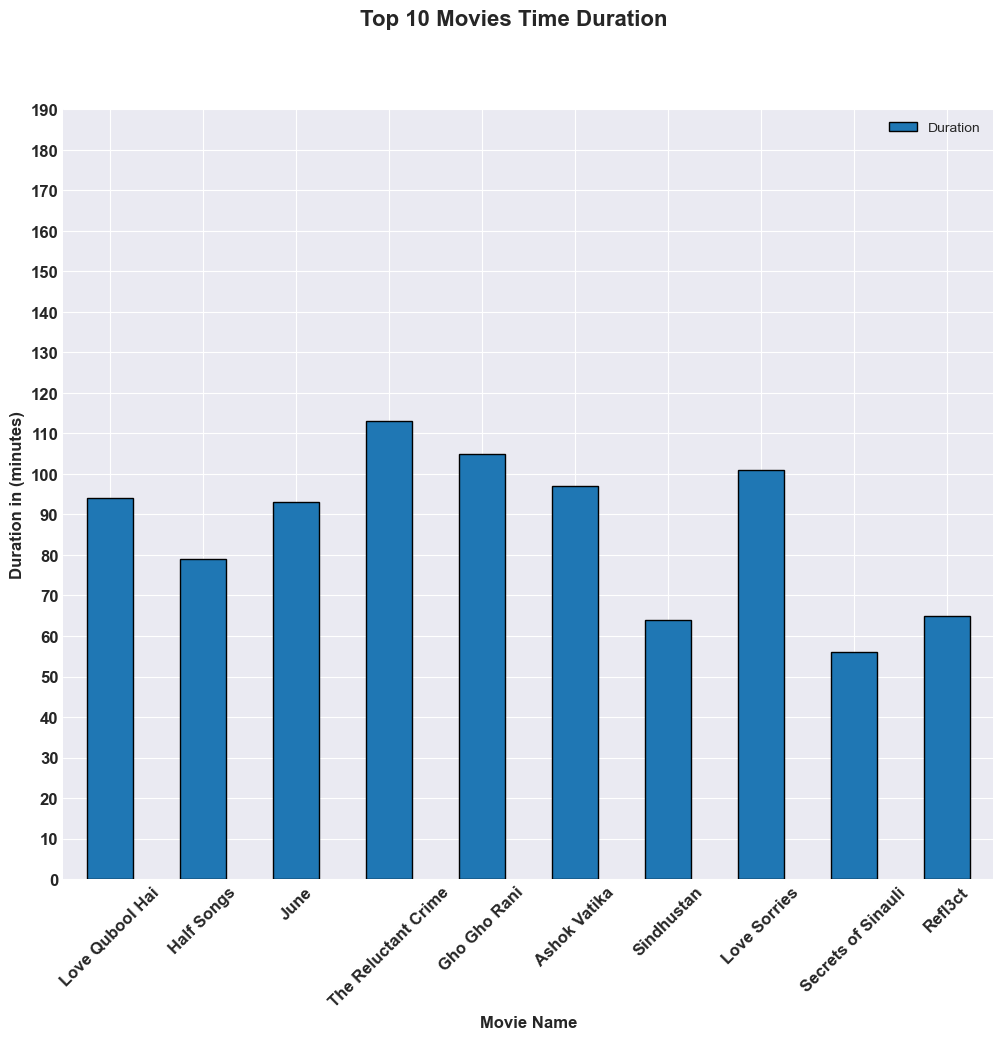

In [131]:
top_rated_movies.plot(x='Name',y='Duration',kind='bar', figsize=(12,10),edgecolor='black')
plt.suptitle('Top 10 Movies Time Duration', fontsize=16,fontweight='bold')
plt.xlabel('Movie Name',fontsize=12,fontweight='bold')
plt.ylabel('Duration in (minutes)',fontsize=12,fontweight='bold')
plt.yticks(range(0,200,10),fontsize=12,fontweight='bold');
plt.xticks(rotation=45,fontsize=12,fontweight='bold'),
plt.show()


In [585]:
df.describe()

,Duration,Rating,Votes
count,11086.000000,11086.000000,11086.000000
mean,101.341241,5.807586,1698.345030
std,40.512502,1.129740,9811.591854
min,21.000000,1.100000,5.000000
25%,60.000000,5.400000,31.000000
50%,102.000000,5.800000,381.500000
75%,137.000000,6.400000,990.000000
max,321.000000,10.000000,591417.000000


In [134]:
low_rated_movies=df[['Name','Rating','Year','Duration','Director']].sort_values(by='Rating',ascending=False).tail(10)
low_rated_movies=low_rated_movies[::-1]
low_rated_movies

,Name,Rating,Year,Duration,Director
12171,Sadak 2,1.1,2020,133,Mahesh Bhatt
3618,Desh Drohi,1.4,2008,140,Jagdish A. Sharma
9639,Mumbai Can Dance Saalaa,1.6,2015,135,Sachindra Sharma
15040,Welcome to New York,1.6,2018,118,Chakri Toleti
11644,Ram Gopal Varma Ki Aag,1.7,2007,171,Ram Gopal Varma
5711,Himmatwala,1.7,2013,150,Sajid Khan
2918,Chatur Singh Two Star,1.7,2011,150,Ajay Chandhok
11005,Prem Aggan,1.7,1998,168,Feroz Khan
5915,Humein Tumse Pyar Ho Gaya Chupke Chupke,1.7,2003,135,Pramod Mandloi
11463,Radhe,1.8,2021,135,Prabhu Deva


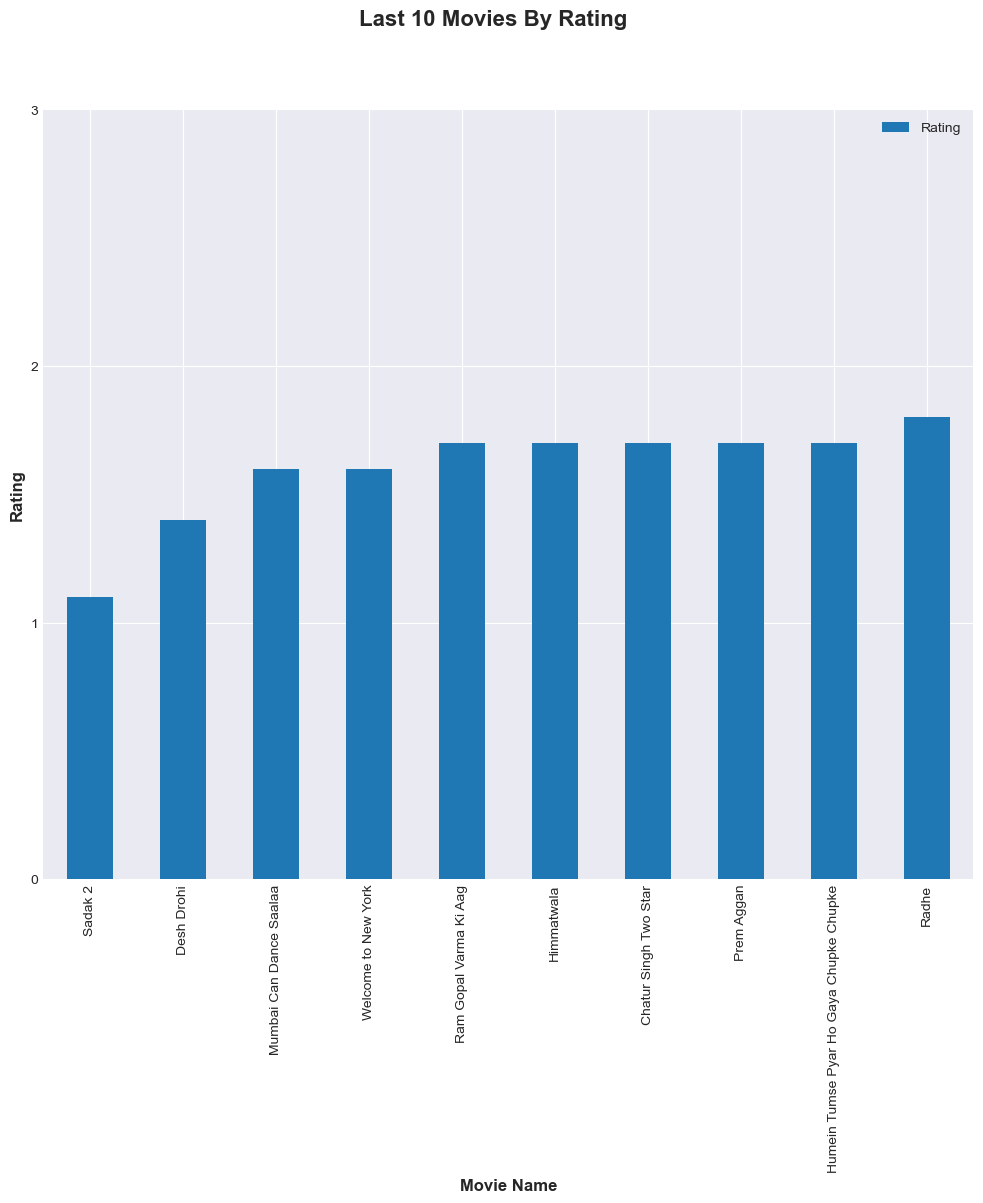

In [139]:
low_rated_movies.plot(x='Name',y='Rating' ,kind='bar',figsize=(12,10))
plt.suptitle('Last 10 Movies By Rating', fontsize=16,fontweight='bold')
plt.xlabel('Movie Name',fontsize=12,fontweight='bold')
plt.ylabel('Rating',fontsize=12,fontweight='bold')
plt.yticks(range(0,4,1));

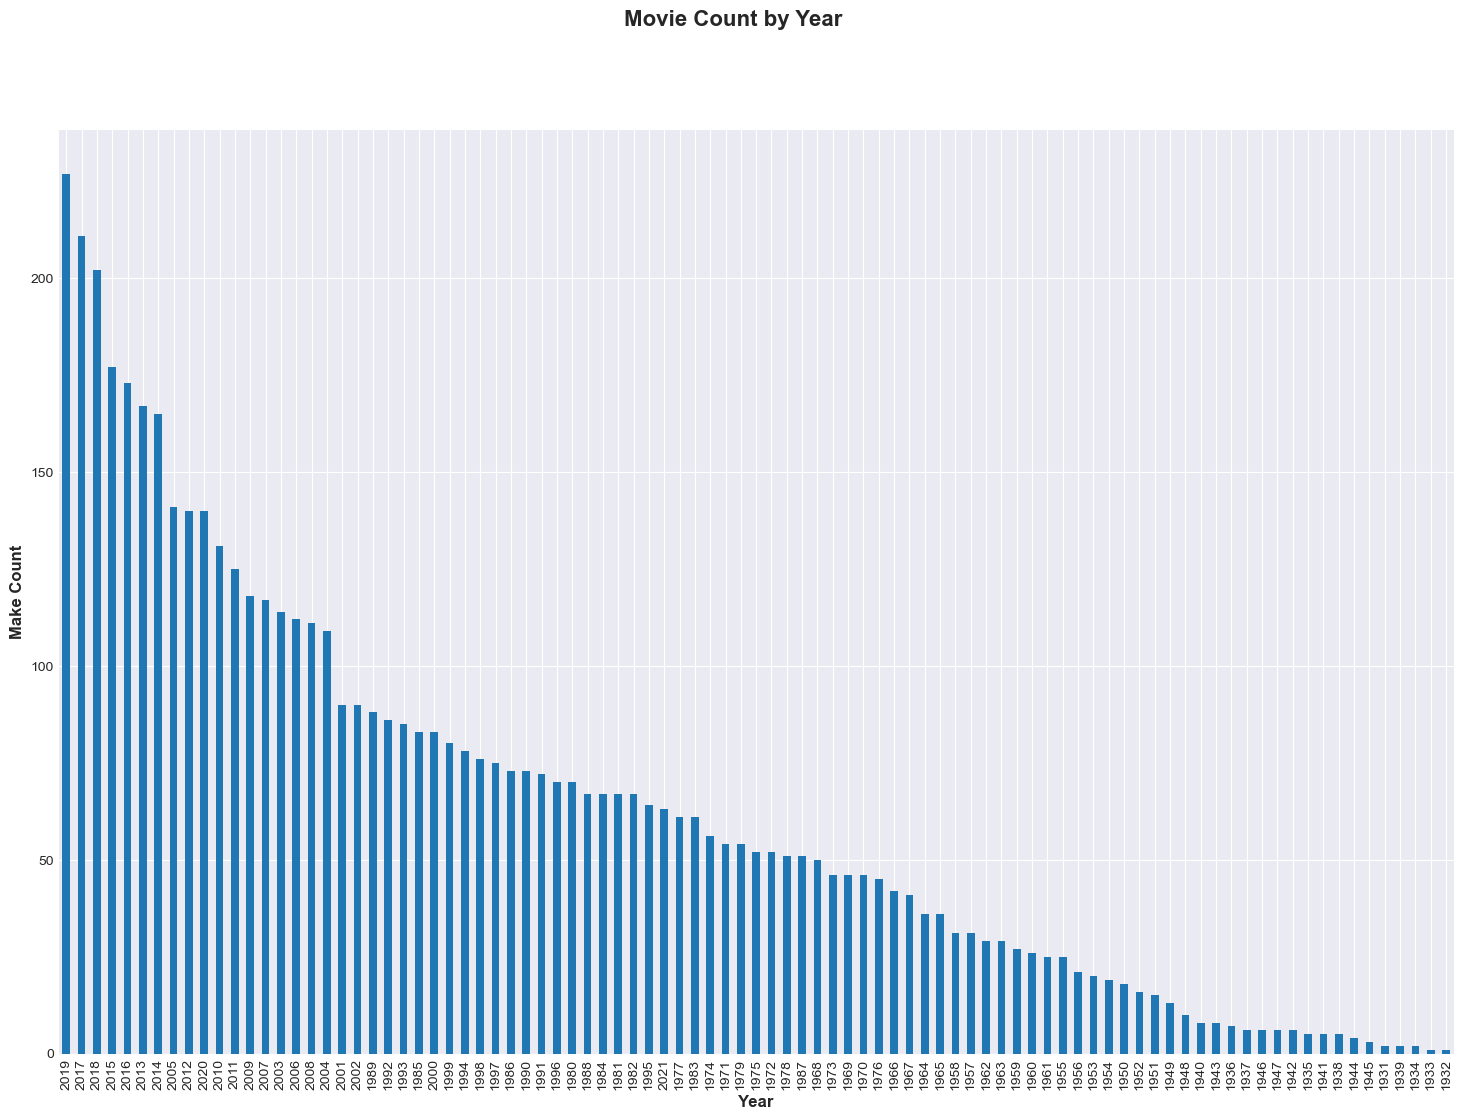

In [140]:
year_counts=df["Year"].value_counts().sort_values(ascending=False)
year_counts.plot(kind='bar' ,figsize=(18,12))
plt.suptitle('Movie Count by Year', fontsize=16,fontweight='bold')
plt.xlabel('Year',fontsize=12,fontweight='bold')
plt.ylabel('Make Count',fontsize=12,fontweight='bold')
plt.show()

In [589]:
vote_count=df[df['Votes']>=1000].sort_values(by="Votes")
vote_count

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
30,15 Park Avenue,(2005),116,Drama,7.1,1002,Aparna Sen,Shabana Azmi,Konkona Sen Sharma,Rahul Bose
10697,Patthar Ke Phool,(1991),155,"Action, Drama, Romance",5.6,1004,Anant Balani,Salman Khan,Raveena Tandon,Kiran Kumar
3494,Daud: Fun on the Run,(1997),180,"Action, Adventure, Comedy",5.9,1006,Ram Gopal Varma,Sanjay Dutt,Urmila Matondkar,Paresh Rawal
8306,Love Breakups Zindagi,(2011),156,"Comedy, Drama, Romance",5.8,1006,Sahil Sangha,Zayed Khan,Dia Mirza,Cyrus Sahukar
4785,Fugly,(2014),134,"Drama, Thriller",4.7,1008,Kabir Sadanand,Jimmy Sheirgill,Mohit Marwah,Kiara Advani
...,...,...,...,...,...,...,...,...,...,...
14038,The Darjeeling Limited,(2007),91,"Adventure, Comedy, Drama",7.2,185127,Wes Anderson,Owen Wilson,Adrien Brody,Jason Schwartzman
4848,Gandhi,(1982),191,"Biography, Drama, History",8.0,220118,Richard Attenborough,Ben Kingsley,John Gielgud,Rohini Hattangadi
8233,Lion,(2016),118,"Biography, Drama",8.0,220526,Garth Davis,Dev Patel,Nicole Kidman,Rooney Mara
75,3 Idiots,(2009),170,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh


In [590]:
vote_counts=df[df['Votes']<=1000].sort_values(by="Votes")
vote_counts

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8135,Lallu Ram,(1985),60,"Action, Comedy, Drama",7.8,5,Shiv Kumar,Urmila Bhatt,Gajendra Chauhan,Vyjayanti Chavan
12454,Sapne Suhane,(1961),60,Romance,4.6,5,Kedar Kapoor,Balraj Sahni,Geeta Bali,Chandrashekhar
6118,Insaf Ka Mandir,(1969),60,"Crime, Drama",6.4,5,B.R. Ishara,Sanjeev Kumar,Snehlata,Nadira
6160,Intezar,(1973),116,Drama,5.8,5,Mohan Singh Kavia,Rinku Jaiswal,Padmini Kapila,Baldev Khosa
12331,Samundari Daku,(1956),60,Action,6.4,5,A.R. Zamindar,Nasir Khan,Nadira,Johnny Walker
...,...,...,...,...,...,...,...,...,...,...
9271,Meri Izzat Bachao,(1984),60,Drama,5.8,990,Qamar Narvi,Kamini Bhatia,Anu Dhawan,Benjamin Gilani
1065,Animal,(2022),60,"Action, Drama",5.8,990,Sandeep Reddy Vanga,Ranbir Kapoor,Parineeti Chopra,Anil Kapoor
7930,Kurukshetra,(2000),129,"Action, Crime, Drama",6.0,996,Mahesh Manjrekar,Mukesh Rishi,Sanjay Dutt,Mahima Chaudhry
5663,Hera Pheri,(1976),164,"Action, Comedy, Crime",6.8,998,Prakash Mehra,Saira Banu,Vinod Khanna,Amitabh Bachchan


In [591]:
gen=df['Genre'].value_counts().sort_values()
gen=pd.DataFrame(gen)
gen

,Genre
"Adventure, Fantasy, Sci-Fi",1
"Comedy, Musical, Family",1
"Comedy, Fantasy, Musical",1
"Action, Comedy, War",1
"Adventure, Crime, Horror",1
...,...
"Action, Crime, Drama",452
Romance,504
"Drama, Romance",507
Action,991


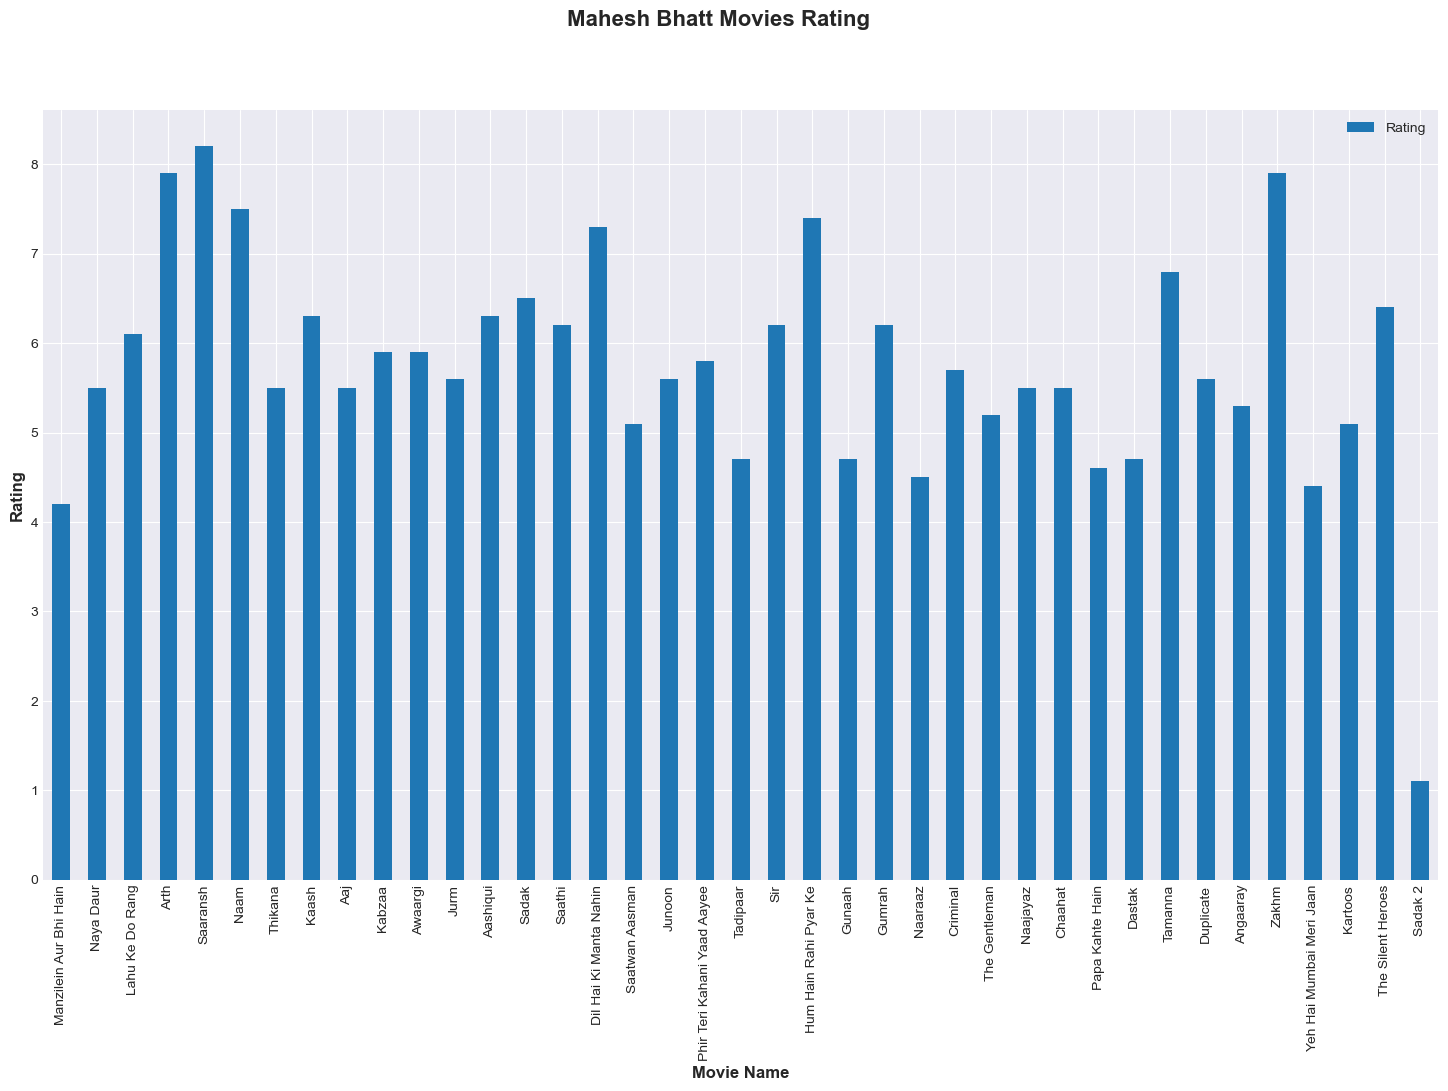

In [141]:
bhatt=df[df['Director'].str.contains('Mahesh Bhatt', case=False)].sort_values(by='Year')
bhatt.plot(x='Name',y='Rating', kind='bar',figsize=(18,10))
plt.suptitle('Mahesh Bhatt Movies Rating', fontsize=16,fontweight='bold')
plt.xlabel('Movie Name',fontsize=12,fontweight='bold')
plt.ylabel('Rating',fontsize=12,fontweight='bold')
plt.show()

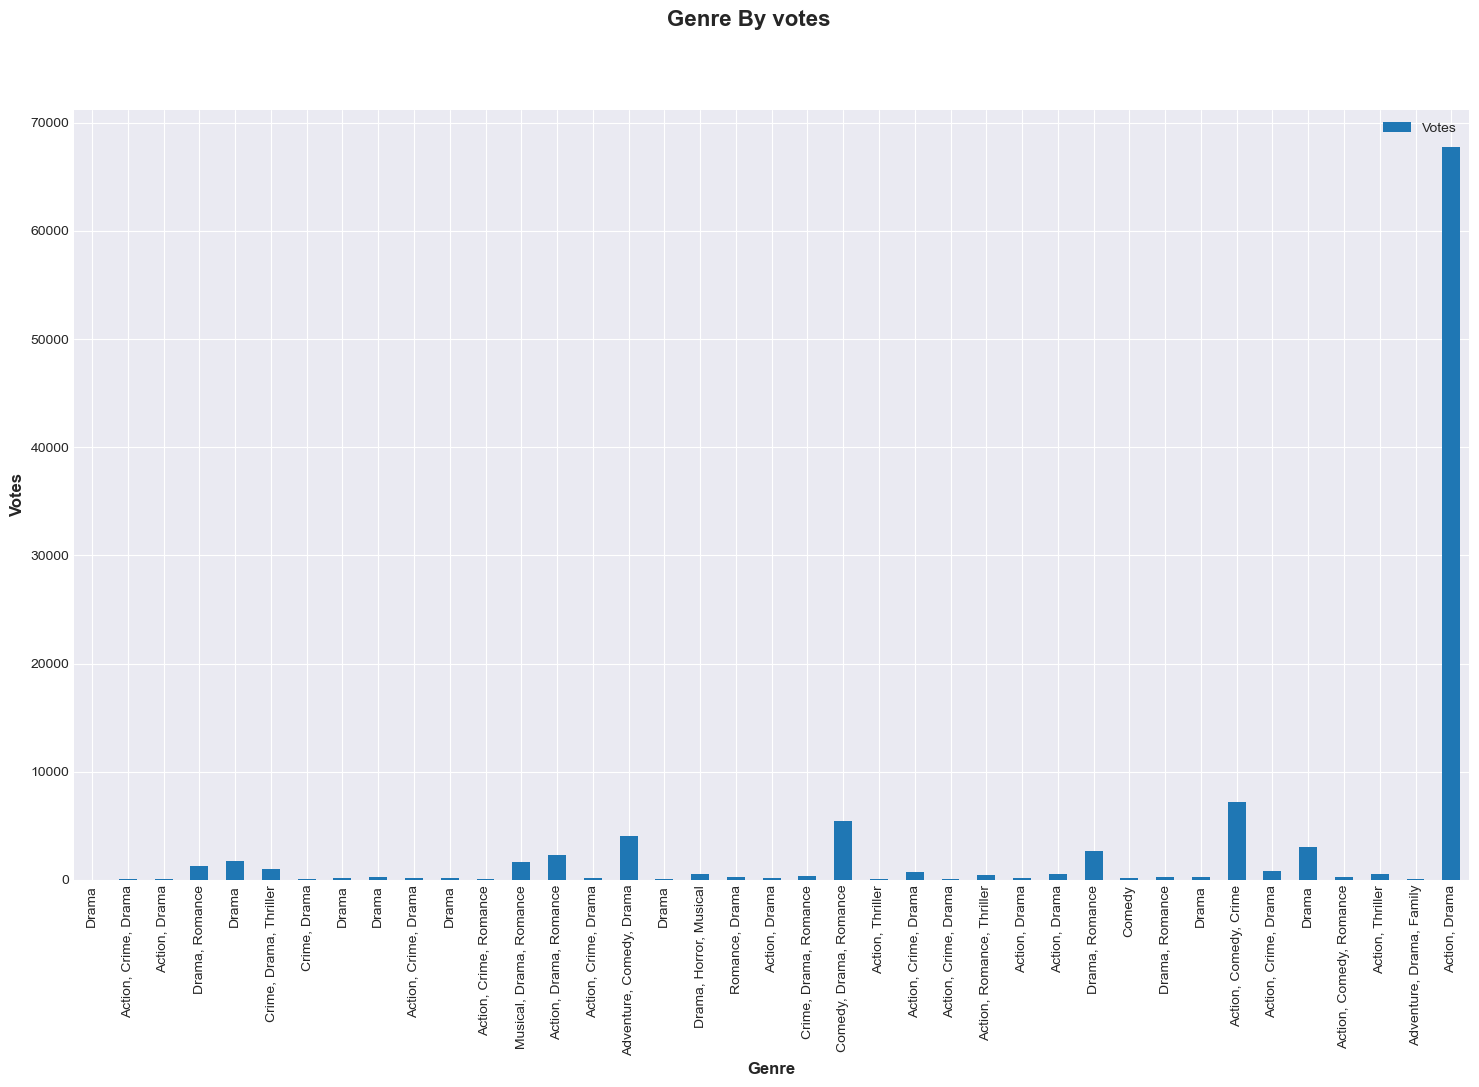

In [142]:
bhatt.plot(x='Genre',y='Votes', kind='bar',figsize=(18,10))
plt.suptitle('Genre By votes', fontsize=16,fontweight='bold')
plt.xlabel('Genre',fontsize=12,fontweight='bold')
plt.ylabel('Votes',fontsize=12,fontweight='bold')
plt.show()

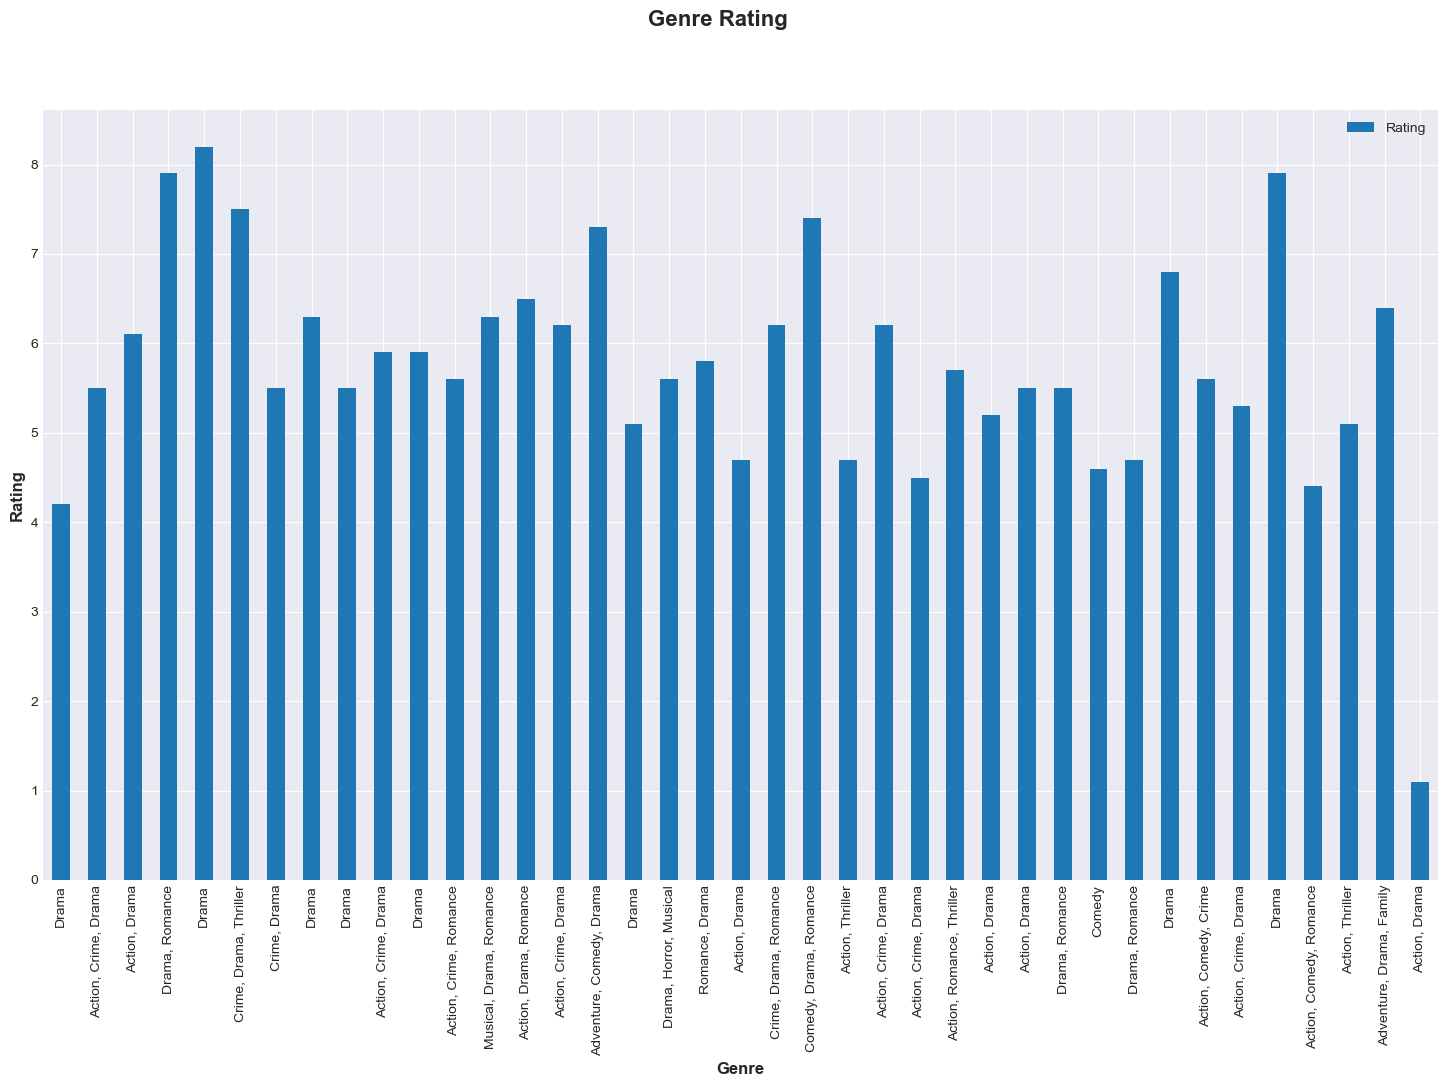

In [144]:
bhatt.plot(x='Genre',y='Rating', kind='bar',figsize=(18,10))
plt.suptitle('Genre Rating', fontsize=16,fontweight='bold')
plt.xlabel('Genre',fontsize=12,fontweight='bold')
plt.ylabel('Rating',fontsize=12,fontweight='bold')
plt.show()

<Axes: ylabel='Genre'>

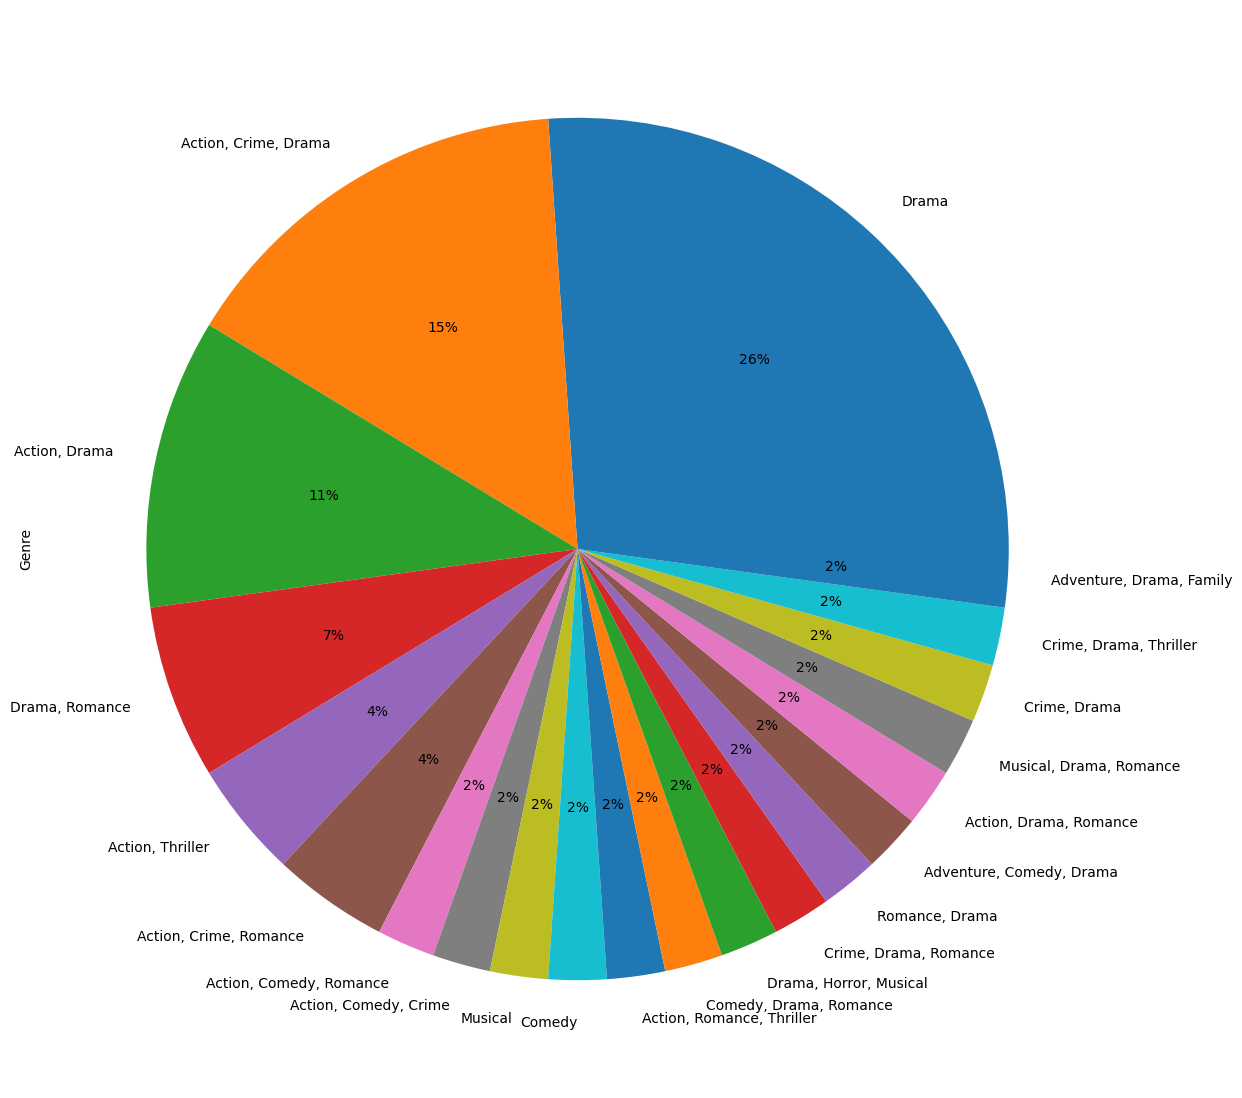

In [594]:
bhatt_pie=bhatt['Genre'].value_counts()
bhatt_pie.plot(kind='pie',figsize=(18,14),autopct='%1.0f%%')

In [162]:
transformed_1=pd.get_dummies(df[['Duration','Genre','Votes','Director','Actor 1']])
transformed_1

,Duration,Votes,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family","Genre_Action, Adventure, Fantasy",...,Actor 1_Zain Khan,Actor 1_Zaira Wasim,Actor 1_Zakir Hussain,Actor 1_Zameer Ashai,Actor 1_Zareen Khan,Actor 1_Zarina Wahab,Actor 1_Zayed Khan,Actor 1_Zeenat Aman,Actor 1_Zenia Starr,Actor 1_Zulfi Sayed
1,109,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,110,35,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,147,827,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,142,1086,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,82,326,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,115,408,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15494,153,1496,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15503,125,44,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15505,129,655,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
x=transformed_1
y=df['Rating']

In [164]:
print(x.shape)
print(y.shape)

(5659, 4769)
(5659,)


In [174]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

model_1 = RandomForestRegressor(random_state=42)
model_1.fit(x_train, y_train)
predict_y = model_1.predict(x_test)

a=model_1.score(x_test,y_test)
print(f'Test Accuracy :{a}' )

mae = mean_absolute_error(y_test,predict_y)
print("Mean Absolute Error:", mae)

Test Accuracy :0.15953992805206796
Mean Absolute Error: 0.9602358657243817
